In [1]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [14]:
from sklearn.model_selection import GridSearchCV
import numpy as np
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer["data"], cancer["target"], random_state=0)

scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


param_grid = {"C": np.logspace(-3, 2, num=6),
              "gamma": np.logspace(-3, 2, num=6)}

grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
print("Best cross-validation accuracy:", grid.best_score_)
print("Best set score:", grid.score(X_test_scaled, y_test))
print("Best parameters:", grid.best_params_)

Best cross-validation accuracy: 0.9812311901504789
Best set score: 0.972027972027972
Best parameters: {'C': 1.0, 'gamma': 1.0}


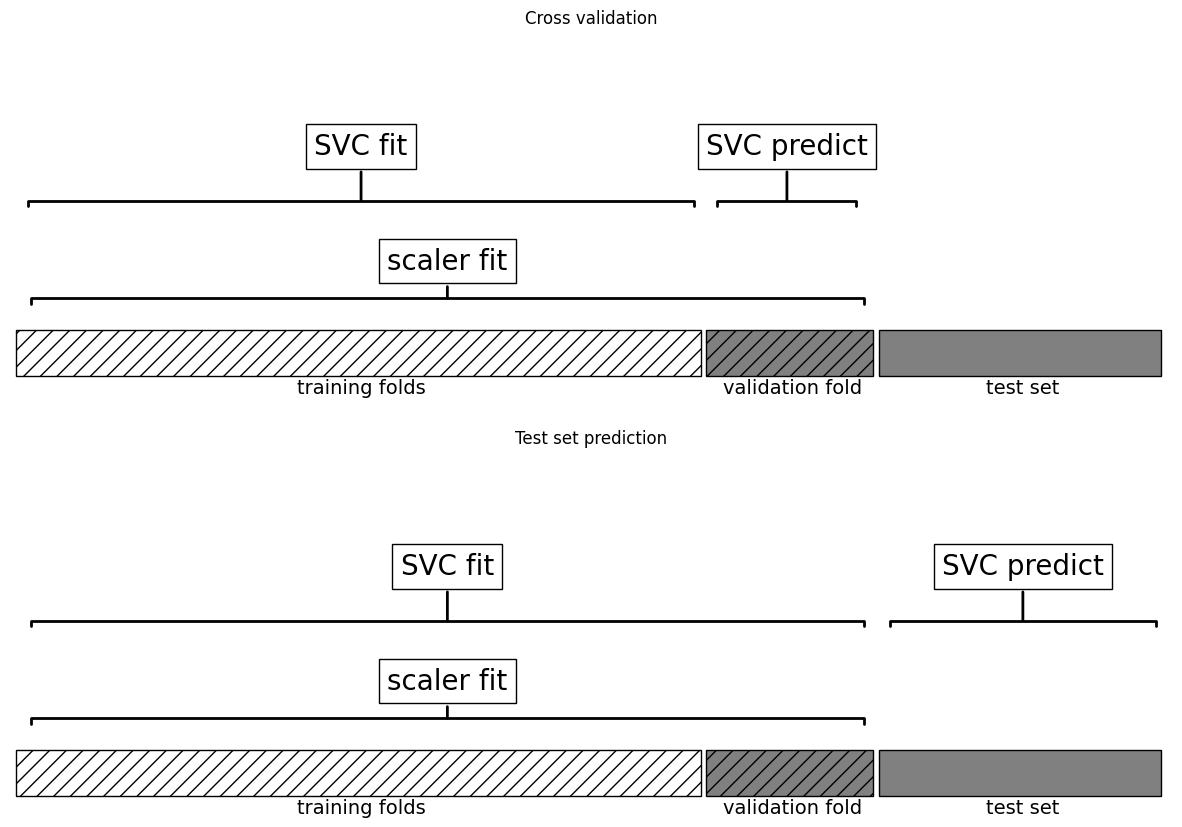

In [7]:
import mglearn
mglearn.plots.plot_improper_processing()

In [10]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])



In [12]:
# pipe.fit()ではまず最初にscalerのfitを呼び出して訓練データ(X_train)をscaler(MinMaxScaler())で変換する
# その次にsvmという名前でSVC()をインスタンス化する
pipe.fit(X_train, y_train)


# pipe.score()を呼ぶとまずテストデータ(X_test)をscaler(MinMaxScaler())で変換する
# その後にsvmのscoreメソッドをX_test_scaled, y_testに対して行う
pipe.score(X_test, y_test)

0.972027972027972